In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [3]:
X_train_full.shape
# 60000 images, 28x28 pixels

(60000, 28, 28)

In [4]:
X_test.shape
# 10000 images, 28x28 pixels

(10000, 28, 28)

In [5]:
X_train_full[0]
# 28 arrays with the length of 28 numbers
# Each pixels has values from 0 to 255, the higher the value the brighter/whiter

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

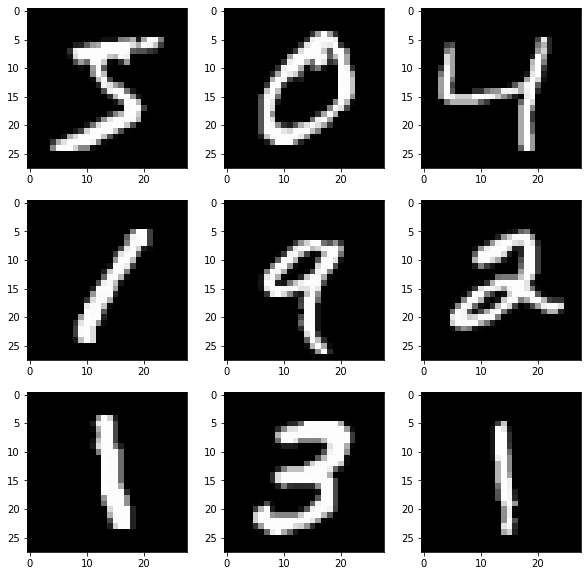

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):        
        axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

In [7]:
# Normalization, divide everything by 255, so all values will be between 0-1
# validation data set has 5000 rows, the rest is for training
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [8]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [11]:
# Convert into string
class_names[y_train[8]]

'9'

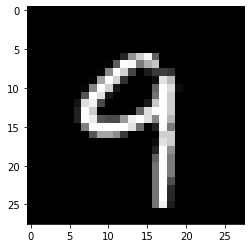

In [12]:
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #input layer equals to the number of features/pixels
model.add(keras.layers.Dense(300, activation = "relu")) #hidden layer1
model.add(keras.layers.Dense(100, activation = "relu")) #hidden layer2
model.add(keras.layers.Dense(10, activation = "softmax")) #output layer depends on the output (possibility of each being 0-9)

#Dense layer means every neuron is connected to other neuron, Sparse means not every neuron is connected (missing links)
#Sigmoid: probabilities produced by a Sigmoid are independent. Images cannot be half a or hald b.
#Softmax: the outputs are interrelated. The sum of all outputs are 1.
        

Metal device set to: Apple M1


2022-03-14 22:41:42.864256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-14 22:41:42.864764: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/#available-optimizers
# https://keras.io/api/metrics/
# Use this sparse_categorical_crossentropy loss function when there are two or more label classes

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
X_train.shape

(55000, 28, 28)

In [18]:
# batch = The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
# epochs = how many times to do a pass over all the dataset
# 1 epoch = (55000/32 = 1719 times to run 32 samples into the model each time) 
# batch_size, increment of 2
# https://keras.io/api/models/model_training_apis/#fit-method
# also possible to use validation_split=0.1
import timeit
start = timeit.default_timer()
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32) 
stop = timeit.default_timer()

Epoch 1/30


2022-03-14 22:41:43.080028: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-14 22:41:43.207923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.6255 - accuracy: 0.8402

2022-03-14 22:41:51.184708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 9s 5ms/step - loss: 0.6255 - accuracy: 0.8402 - val_loss: 0.3031 - val_accuracy: 0.9184
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2876 - accuracy: 0.9184 - val_loss: 0.2346 - val_accuracy: 0.9358
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2346 - accuracy: 0.9334 - val_loss: 0.1965 - val_accuracy: 0.9434
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2010 - accuracy: 0.9430 - val_loss: 0.1761 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1760 - accuracy: 0.9496 - val_loss: 0.1587 - val_accuracy: 0.9546
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1569 - accuracy: 0.9555 - val_loss: 0.1423 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1412 - accuracy: 0.9601 - val_loss: 0.1304 - val_accuracy: 0.9646
Epo

In [22]:
Time1=print('Time: ', stop - start)


Time:  251.029462084


In [23]:
m1=pd.DataFrame(history.history)
m1

,loss,accuracy,val_loss,val_accuracy
0,0.625506,0.840200,0.303091,0.9184
1,0.287647,0.918364,0.234602,0.9358
2,0.234640,0.933364,0.196489,0.9434
3,0.200997,0.942982,0.176137,0.9518
4,0.175987,0.949636,0.158655,0.9546
5,0.156862,0.955527,0.142301,0.9600
6,0.141198,0.960127,0.130439,0.9646
7,0.128052,0.964073,0.122226,0.9676
8,0.116931,0.966964,0.112981,0.9700
9,0.107615,0.969273,0.108845,0.9704


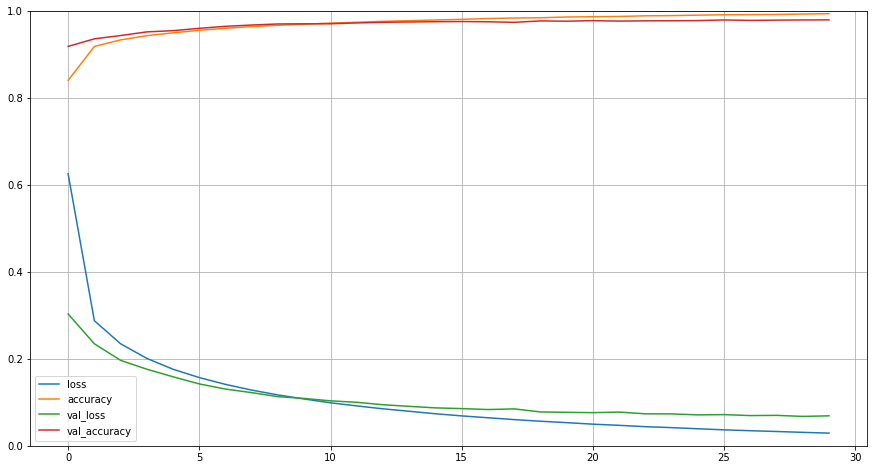

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [66]:
# Test the model on test set 
# Loss,Accuracy
p1=model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0665 - accuracy: 0.9787


In [26]:
model.predict(X_test)
# Each array that has a length of 10 represents the probability that the test data belongs to the class 0,1,2..,9

2022-03-14 22:46:37.462249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2.0569405e-06, 3.4678283e-06, 1.0168925e-04, ..., 9.9893826e-01,
        4.8998554e-06, 6.2578511e-05],
       [2.1778057e-07, 3.7059584e-05, 9.9989927e-01, ..., 2.0736084e-12,
        7.6852639e-06, 3.5511812e-13],
       [1.6441508e-06, 9.9715227e-01, 2.4805375e-04, ..., 1.5696429e-03,
        4.8444790e-04, 6.3642678e-06],
       ...,
       [4.6312273e-11, 7.0556463e-11, 2.5828511e-11, ..., 1.0242065e-06,
        1.7379436e-06, 1.7930453e-05],
       [4.4222821e-07, 9.4324673e-09, 6.3426747e-10, ..., 1.1213422e-09,
        5.1165236e-05, 1.7644218e-10],
       [2.9308680e-07, 2.9082420e-10, 3.1505061e-07, ..., 1.2659740e-11,
        1.9886249e-08, 1.0854801e-10]], dtype=float32)

In [27]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

array([7, 2, 1, ..., 4, 5, 6])

In [28]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

In [29]:
pd.DataFrame(confusion_matrix)

,0,1,2,3,4,5,6,7,8,9
0,967,0,0,1,1,1,2,2,4,2
1,0,1124,2,1,0,1,2,1,4,0
2,4,3,1006,1,4,0,2,5,7,0
3,0,0,3,993,0,3,0,4,5,2
4,1,0,3,0,965,0,1,1,0,11
5,2,0,0,8,1,868,4,2,5,2
6,4,2,0,1,5,5,936,0,5,0
7,2,4,7,3,0,0,0,1002,4,6
8,3,1,4,3,3,3,1,2,952,2
9,3,4,0,6,9,1,2,5,5,974


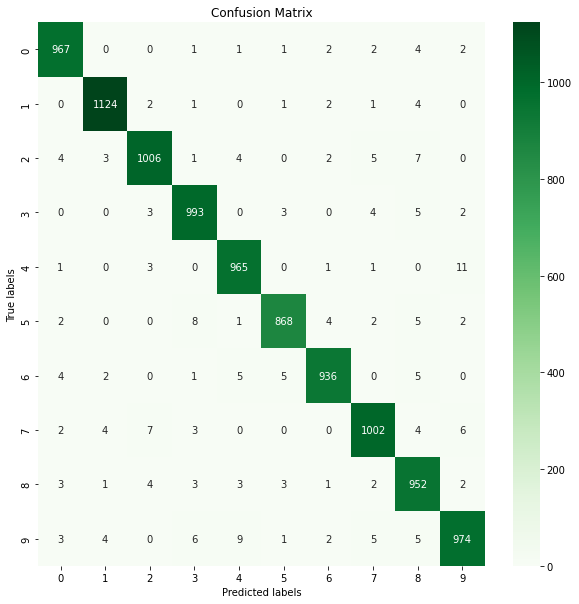

In [30]:
import seaborn as sb    

# ax = plt.figure(figsize=(8, 6))
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)


plt.show()

## M2:Test for other settings of the network, batch size 20, epochs 40

In [31]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28,28]))
model2.add(keras.layers.Dense(300, activation = "relu"))
model2.add(keras.layers.Dense(100, activation = "relu"))
model2.add(keras.layers.Dense(10, activation = "softmax"))

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [34]:
start = timeit.default_timer()
history = model2.fit(X_train, y_train, epochs=40, validation_data = (X_valid, y_valid), batch_size=20) 
stop = timeit.default_timer()

Epoch 1/40
  26/2750 [..............................] - ETA: 11s - loss: 2.2624 - accuracy: 0.1500    

2022-03-14 22:46:39.234990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2742/2750 [============================>.] - ETA: 0s - loss: 0.5105 - accuracy: 0.8661

2022-03-14 22:46:50.223222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2750/2750 [==============================] - 12s 4ms/step - loss: 0.5097 - accuracy: 0.8662 - val_loss: 0.2545 - val_accuracy: 0.9306
Epoch 2/40
2750/2750 [==============================] - 12s 4ms/step - loss: 0.2443 - accuracy: 0.9300 - val_loss: 0.1967 - val_accuracy: 0.9442
Epoch 3/40
2750/2750 [==============================] - 11s 4ms/step - loss: 0.1925 - accuracy: 0.9446 - val_loss: 0.1641 - val_accuracy: 0.9570
Epoch 4/40
2750/2750 [==============================] - 11s 4ms/step - loss: 0.1592 - accuracy: 0.9543 - val_loss: 0.1405 - val_accuracy: 0.9596
Epoch 5/40
2750/2750 [==============================] - 11s 4ms/step - loss: 0.1360 - accuracy: 0.9615 - val_loss: 0.1237 - val_accuracy: 0.9678
Epoch 6/40
2750/2750 [==============================] - 12s 4ms/step - loss: 0.1180 - accuracy: 0.9663 - val_loss: 0.1124 - val_accuracy: 0.9694
Epoch 7/40
2750/2750 [==============================] - 12s 4ms/step - loss: 0.1037 - accuracy: 0.9701 - val_loss: 0.1069 - val_accuracy: 0.9

In [35]:
Time2=print('Time: ', stop - start)

Time:  463.726773292


In [36]:
m2=pd.DataFrame(history.history)
m2

,loss,accuracy,val_loss,val_accuracy
0,0.509723,0.866200,0.254511,0.9306
1,0.244331,0.929964,0.196702,0.9442
2,0.192476,0.944636,0.164064,0.9570
3,0.159161,0.954291,0.140455,0.9596
4,0.135955,0.961455,0.123715,0.9678
5,0.118002,0.966291,0.112381,0.9694
6,0.103698,0.970091,0.106885,0.9718
7,0.091846,0.973691,0.098672,0.9738
8,0.082299,0.976636,0.093613,0.9748
9,0.073540,0.979418,0.085538,0.9748


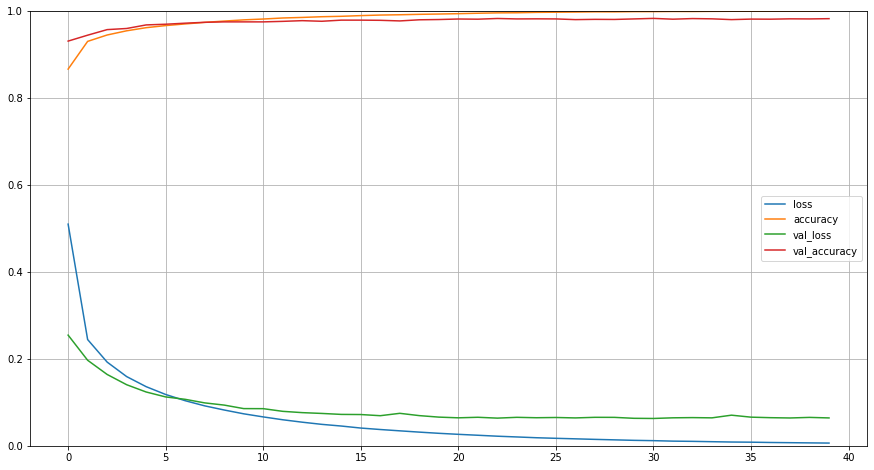

In [37]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [65]:
p2=model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0645 - accuracy: 0.9812


In [39]:
y_prob = model2.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

2022-03-14 22:54:24.220105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([7, 2, 1, ..., 4, 5, 6])

In [40]:
confusion_matrix2 = tf.math.confusion_matrix(y_test, y_classes)
pd.DataFrame(confusion_matrix2)

,0,1,2,3,4,5,6,7,8,9
0,969,0,0,1,0,1,2,1,4,2
1,0,1124,3,2,0,1,2,1,2,0
2,3,1,1014,1,3,0,1,4,5,0
3,0,0,7,994,0,3,0,1,2,3
4,2,0,4,1,964,0,1,2,0,8
5,2,0,0,7,1,872,4,1,3,2
6,5,2,1,1,5,6,938,0,0,0
7,2,4,7,2,0,0,0,1001,5,7
8,4,1,1,3,4,3,1,2,952,3
9,3,2,0,4,7,4,1,1,3,984


# M3:Test for other settings of the network, adding layers by 300

In [41]:
#Dense layer means every neuron is connected to other neuron, Sparse means not every neuron is connected (missing links)
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[28,28]))
model3.add(keras.layers.Dense(600, activation = "relu"))
model3.add(keras.layers.Dense(400, activation = "relu"))
model3.add(keras.layers.Dense(10, activation = "softmax")) 

In [42]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 600)               471000    
                                                                 
 dense_7 (Dense)             (None, 400)               240400    
                                                                 
 dense_8 (Dense)             (None, 300)               120300    
                                                                 
Total params: 831,700
Trainable params: 831,700
Non-trainable params: 0
_________________________________________________________________


In [43]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [44]:
start = timeit.default_timer()
history = model3.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32) 
stop = timeit.default_timer()

Epoch 1/30
  20/1719 [..............................] - ETA: 9s - loss: 5.3803 - accuracy: 0.0875     

2022-03-14 22:54:25.031129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7114 - accuracy: 0.8308

2022-03-14 22:54:33.931976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 5ms/step - loss: 0.7114 - accuracy: 0.8308 - val_loss: 0.3247 - val_accuracy: 0.9128
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3030 - accuracy: 0.9137 - val_loss: 0.2700 - val_accuracy: 0.9246
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2510 - accuracy: 0.9283 - val_loss: 0.2175 - val_accuracy: 0.9398
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2152 - accuracy: 0.9389 - val_loss: 0.1858 - val_accuracy: 0.9488
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1876 - accuracy: 0.9466 - val_loss: 0.1688 - val_accuracy: 0.9544
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1654 - accuracy: 0.9524 - val_loss: 0.1557 - val_accuracy: 0.9580
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1474 - accuracy: 0.9579 - val_loss: 0.1426 - val_accuracy: 0.9596
Ep

In [45]:
Time3=print('Time: ', stop - start)

Time:  277.7074143750001


In [46]:
m3=pd.DataFrame(history.history)
m3

,loss,accuracy,val_loss,val_accuracy
0,0.711351,0.830818,0.324698,0.9128
1,0.302968,0.913727,0.269972,0.9246
2,0.250964,0.928291,0.217458,0.9398
3,0.215168,0.938909,0.185803,0.9488
4,0.187563,0.946600,0.168756,0.9544
5,0.165437,0.952400,0.155687,0.9580
6,0.147415,0.957891,0.142579,0.9596
7,0.133084,0.962309,0.132647,0.9646
8,0.120140,0.966091,0.119993,0.9670
9,0.109597,0.969473,0.112692,0.9698


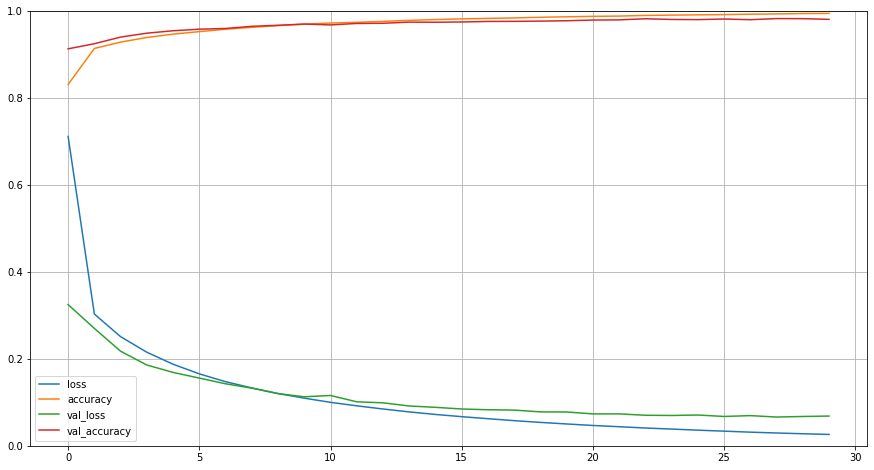

In [47]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [64]:
p3=model3.evaluate(X_test, y_test)
p3

313/313 [==============================] - 1s 4ms/step - loss: 0.0692 - accuracy: 0.9781


[0.06920433789491653, 0.978100061416626]

In [49]:
model3.predict(X_test)

2022-03-14 22:59:03.930559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2.78321772e-06, 8.75881696e-08, 4.87785474e-05, ...,
        1.91362828e-10, 2.64861827e-10, 4.16937318e-10],
       [1.00916543e-06, 2.81061279e-04, 9.99527931e-01, ...,
        5.14768740e-12, 3.57983196e-12, 9.04806286e-13],
       [5.79833625e-07, 9.98575687e-01, 1.11632064e-04, ...,
        8.77090045e-08, 8.64811085e-08, 8.11702208e-08],
       ...,
       [3.39513070e-11, 2.46520471e-10, 8.22847953e-12, ...,
        2.29431643e-15, 4.18322298e-15, 1.29342829e-14],
       [1.47866555e-08, 1.79130613e-08, 7.16353019e-11, ...,
        4.04856243e-13, 3.47856374e-13, 1.90932014e-13],
       [4.27528249e-07, 4.49601856e-10, 7.27344300e-08, ...,
        3.28451340e-15, 8.70176428e-15, 4.96747258e-15]], dtype=float32)

In [50]:
y_prob = model3.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

array([7, 2, 1, ..., 4, 5, 6])

In [51]:
confusion_matrix3 = tf.math.confusion_matrix(y_test, y_classes)
pd.DataFrame(confusion_matrix3)

,0,1,2,3,4,5,6,7,8,9
0,971,0,1,0,2,1,1,1,2,1
1,0,1127,2,1,0,1,2,0,2,0
2,5,5,1001,2,4,0,4,5,6,0
3,0,0,3,997,0,3,0,2,1,4
4,1,0,2,0,968,0,3,2,1,5
5,3,0,0,13,1,862,6,1,2,4
6,5,3,2,1,5,5,936,0,1,0
7,0,7,3,5,0,0,0,1005,3,5
8,5,1,2,8,3,3,5,4,940,3
9,3,4,0,8,11,1,1,5,2,974


# M4:Test for other settings of the network, Layer +300 batch size 20, epochs 40

In [52]:
#Dense layer means every neuron is connected to other neuron, Sparse means not every neuron is connected (missing links)
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=[28,28]))
model4.add(keras.layers.Dense(600, activation = "relu"))
model4.add(keras.layers.Dense(400, activation = "relu"))
model4.add(keras.layers.Dense(300, activation = "softmax"))

In [53]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 600)               471000    
                                                                 
 dense_10 (Dense)            (None, 400)               240400    
                                                                 
 dense_11 (Dense)            (None, 300)               120300    
                                                                 
Total params: 831,700
Trainable params: 831,700
Non-trainable params: 0
_________________________________________________________________


In [54]:
model4.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [55]:
start = timeit.default_timer()
history = model4.fit(X_train, y_train, epochs=40, validation_data = (X_valid, y_valid), batch_size=20) 
stop = timeit.default_timer()

Epoch 1/40
  23/2750 [..............................] - ETA: 12s - loss: 5.3495 - accuracy: 0.0804    

2022-03-14 22:59:05.696932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2747/2750 [============================>.] - ETA: 0s - loss: 0.5733 - accuracy: 0.8541

2022-03-14 22:59:18.196760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2750/2750 [==============================] - 13s 5ms/step - loss: 0.5729 - accuracy: 0.8541 - val_loss: 0.2796 - val_accuracy: 0.9232
Epoch 2/40
2750/2750 [==============================] - 13s 5ms/step - loss: 0.2624 - accuracy: 0.9247 - val_loss: 0.2203 - val_accuracy: 0.9386
Epoch 3/40
2750/2750 [==============================] - 13s 5ms/step - loss: 0.2053 - accuracy: 0.9414 - val_loss: 0.1870 - val_accuracy: 0.9484
Epoch 4/40
2750/2750 [==============================] - 13s 5ms/step - loss: 0.1677 - accuracy: 0.9523 - val_loss: 0.1492 - val_accuracy: 0.9594
Epoch 5/40
2750/2750 [==============================] - 13s 5ms/step - loss: 0.1410 - accuracy: 0.9604 - val_loss: 0.1355 - val_accuracy: 0.9634
Epoch 6/40
2750/2750 [==============================] - 13s 5ms/step - loss: 0.1208 - accuracy: 0.9661 - val_loss: 0.1179 - val_accuracy: 0.9680
Epoch 7/40
2750/2750 [==============================] - 13s 5ms/step - loss: 0.1045 - accuracy: 0.9706 - val_loss: 0.1065 - val_accuracy: 0.9

In [56]:
print('Time: ', stop - start)

Time:  530.7866812919999


In [57]:
m4=pd.DataFrame(history.history)
m4

,loss,accuracy,val_loss,val_accuracy
0,0.572919,0.854145,0.279611,0.9232
1,0.262448,0.924655,0.220338,0.9386
2,0.205288,0.941418,0.187006,0.9484
3,0.167747,0.952309,0.149224,0.9594
4,0.140997,0.960364,0.135545,0.9634
5,0.120840,0.966091,0.117884,0.9680
6,0.104514,0.970582,0.106514,0.9694
7,0.091771,0.974127,0.095645,0.9728
8,0.080529,0.976873,0.094874,0.9730
9,0.072168,0.979200,0.083857,0.9756


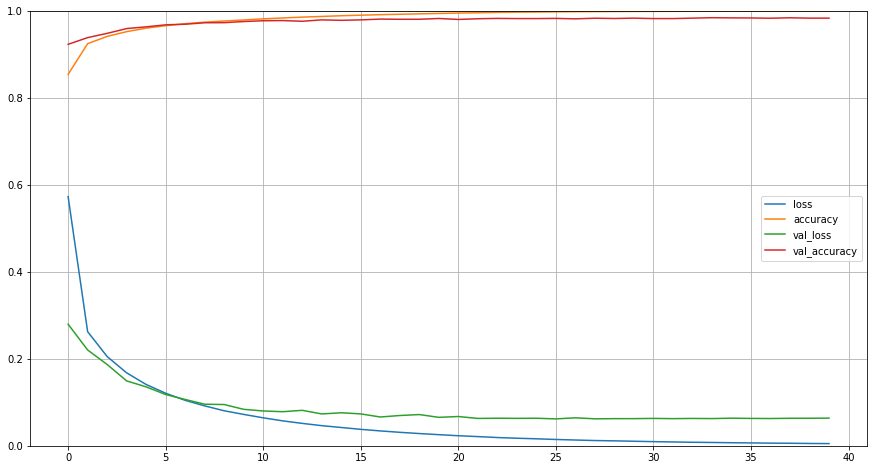

In [58]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [63]:
p4=model4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0652 - accuracy: 0.9806


In [60]:
model4.predict(X_test)

2022-03-14 23:07:57.921682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2.48870947e-07, 2.72578027e-09, 2.06460049e-06, ...,
        1.87478835e-11, 2.02790458e-11, 2.52059432e-11],
       [7.47156914e-09, 5.42157204e-06, 9.99993205e-01, ...,
        1.25408564e-14, 8.56600184e-15, 1.45410485e-15],
       [1.61775500e-08, 9.99706626e-01, 1.09533548e-05, ...,
        6.41467501e-09, 5.55879476e-09, 5.05581843e-09],
       ...,
       [3.00825886e-14, 3.17659440e-12, 2.57370792e-15, ...,
        1.83811361e-17, 3.26051503e-17, 6.42290724e-17],
       [4.22764150e-11, 5.08269772e-12, 1.11837927e-14, ...,
        7.22726204e-16, 6.54952292e-16, 2.74623116e-16],
       [2.90421687e-09, 7.96811510e-13, 2.62578764e-10, ...,
        9.09430986e-18, 2.22263364e-17, 1.15950075e-17]], dtype=float32)

In [61]:
y_prob = model4.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

array([7, 2, 1, ..., 4, 5, 6])

In [62]:
confusion_matrix4 = tf.math.confusion_matrix(y_test, y_classes)
pd.DataFrame(confusion_matrix4)

,0,1,2,3,4,5,6,7,8,9
0,974,0,1,0,1,0,0,1,2,1
1,0,1125,2,1,0,1,2,1,3,0
2,5,2,1003,2,3,0,5,4,8,0
3,0,0,4,993,0,4,0,1,3,5
4,1,0,4,0,962,0,1,3,1,10
5,2,0,0,8,1,871,4,1,3,2
6,5,3,2,1,6,3,936,0,2,0
7,2,4,4,3,0,0,0,1005,7,3
8,4,0,3,4,2,1,3,2,953,2
9,2,2,0,5,8,3,1,2,2,984
